In [1]:
from keras.models import load_model, Model
import cv2
import matplotlib.pyplot as plt
import os
from skimage.io import imshow, imread
import numpy as np
%matplotlib inline

Using TensorFlow backend.
/home/wvillegas/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
mobilenet = load_model('../cmdscripts/modelosV2/modelR2.h5')

In [3]:
mobilenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

Yema seleccionada 0244, No Yema seleccionada 0246

In [62]:
data = imread("/Backup/sperez/vise/data/images/corpus-26000/0246.jpg")

(-0.5, 199.5, 199.5, -0.5)

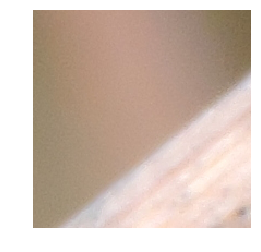

In [63]:
plt.imshow(data)
plt.axis('off')

In [64]:
data = cv2.resize(data, (224,224),cv2.INTER_AREA)
data = cv2.normalize(data, data, 0, 255, cv2.NORM_MINMAX)
data = np.expand_dims(data, axis=0)

(-0.5, 223.5, 223.5, -0.5)

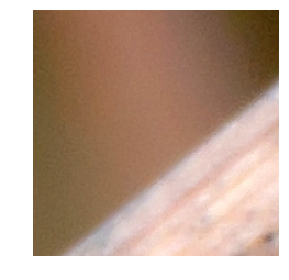

In [65]:
imshow(data[0])
plt.axis('off')

In [74]:
layer_name = 'conv_dw_12_relu'
intermediate_layer_model = Model(inputs=mobilenet.input,
                                 outputs=mobilenet.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(data)

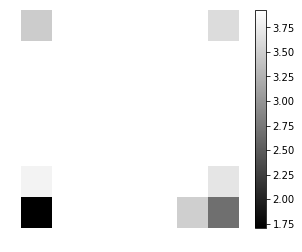

In [77]:
plt.imshow(intermediate_output[0,:,:,1])
plt.gray()
plt.axis('off')
plt.colorbar()